In [2]:
%matplotlib inline

import numpy
from astropy import units
from astropy import constants
from matplotlib import pyplot as plt

## This is my markdown code

- A list
- Will be bullets

But can also write equations:

$$
J_\nu = \frac{1}{4\pi}\int I_\nu d\Omega
$$

In [3]:
x = 1

In [4]:
x = x+2

In [5]:
npts = 50
data = numpy.random.uniform(size=npts)
x = numpy.arange(npts)

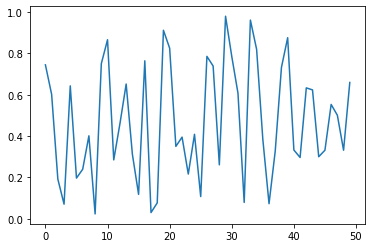

In [6]:
fig, ax = plt.subplots()
my_plot = ax.plot(x, data)

In [7]:
my_plot[0].set_ydata((x-20)**2)
ax.set_ylim(0, 29**2)
ax.set_xlim(0, 49)

(0.0, 49.0)

In [8]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

## Jupyterlab keyboard shortcuts

* esc: quit edit mode
* enter: enter edit mode

Shortcuts for outside edit mode:
* a: add cell above
* b: add cell below
* m: markdown cell
* c: copy cells
* x: cut cells
* d, d: delete cells
* z: undo cell operation

Other stuff:
* Split cells, merge cells

In [9]:
a = 2

In [10]:
a += 1  # ctrl + enter

In [11]:
a

3

----

## astropy units and constants

In [12]:
42 * units.m

<Quantity 42. m>

In [13]:
42 * units.meter

<Quantity 42. m>

In [14]:
units.Quantity([10, 42], unit='m')

<Quantity [10., 42.] m>

In [15]:
15.1 * units.meter / (32.0 * units.second)  

<Quantity 0.471875 m / s>

In [16]:
3.0 * units.kilometer / (130.51 * units.meter / units.second)  

<Quantity 0.02298674 km s / m>

In [17]:
(3.0 * units.kilometer / (130.51 * units.meter / units.second)).decompose()  

<Quantity 22.98674431 s>

In [18]:
4 * units.s + 41 * units.km

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

### Unit conversion

In [19]:
x = 1.0 * units.parsec
x.to('km')

<Quantity 3.08567758e+13 km>

In [20]:
(units.s ** -1).compose()

[Unit("Hz"), Unit("Bq"), Unit("2.7027e-11 Ci")]

In [21]:
(1.0 * units.Pa).cgs

<Quantity 10. P / s>

In [22]:
(1e6 * units.erg).si

<Quantity 0.1 m N>

In [23]:
constants.c.cgs

<Quantity 2.99792458e+10 cm / s>

In [24]:
(constants.h * 400 * units.PHz)

<Quantity 2.65042806e-31 J PHz s>

In [25]:
(constants.h * 400 * units.PHz).to('J')

<Quantity 2.65042806e-16 J>

### Unit equivalencies

Built-in equivalencies: 
* Paralax
* Spectral
* Doppler
* ...


In [26]:
(0.2 * units.arcsec).to('parsec')

UnitConversionError: 'arcsec' (angle) and 'pc' (length) are not convertible

In [27]:
(0.01 * units.arcsec).to('parsec', equivalencies=units.parallax())

<Quantity 100. pc>

In [28]:
(500 * units.nm).to('Hz', equivalencies=units.spectral())

<Quantity 5.99584916e+14 Hz>

In [29]:
restfreq = 115.27120 * units.GHz  # rest frequency of 12 CO 1-0 in GHz
freq_to_vel = units.doppler_radio(restfreq)
(116e9 * units.Hz).to(units.km / units.s, equivalencies=freq_to_vel)  

<Quantity -1895.43219287 km / s>

In [30]:
def b_lambda(wave, temp):
    temp = temp[:, numpy.newaxis]
    tmp = (2 * constants.h * constants.c ** 2 / wave ** 5) / (
        numpy.exp(constants.h * constants.c / (wave * constants.k_B * temp)) - 1)
    return tmp

waves = units.Quantity([500, 600], unit='nm')
temps = units.Quantity([2000, 5000, 7000], unit='K')
b_lambda(waves, temps)

<Quantity [[2.15054764e-36, 9.50750845e-36],
           [1.21071906e-32, 1.27623885e-32],
           [6.35276385e-32, 5.14976957e-32]] J m2 / (nm5 s)>

/Users/tiago/mambaforge/envs/py310/lib/python3.10/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


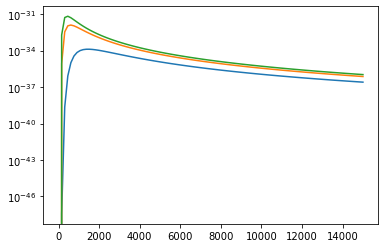

In [31]:
fig, ax = plt.subplots()
waves = numpy.linspace(0.1, 15000, 100) * units.nm
temps = units.Quantity([2000, 5000, 7000], unit='K')
result = b_lambda(waves, temps)
for r in result:
    ax.plot(waves, r)

ax.set_yscale('log')

In [32]:
a = numpy.arange(5)
b = numpy.arange(10)
a[:, numpy.newaxis] * b

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36]])